In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/picture/chessboard.jpg
/kaggle/input/picture/2.jpg


In [3]:
import cv2 as cv
import matplotlib.pyplot as plt

In [4]:
import utils

/kaggle/input/picture/chessboard.jpg
/kaggle/input/picture/2.jpg


In [24]:
img = cv.imread('/kaggle/input/picture/2.jpg')

In [7]:
pos = utils.getCardsBlackPos(img)

In [96]:
is24Checker = True
lower_black = np.array([0, 0, 0])
upper_black = np.array([179, 255, 75])
COLOR_RANGE = {'black': [lower_black, upper_black]}
patchPos = {}

img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)  # Convert BGR to HSV
img_hsv = cv.blur(img_hsv, (10,10)) #Smoothens the sharp edges and cover highlights
black_mask = cv.inRange(
    img_hsv, COLOR_RANGE['black'][0], COLOR_RANGE['black'][1])

kernel = cv.getStructuringElement(cv.MORPH_RECT, (10, 10))
mask = cv.morphologyEx(black_mask.copy(), cv.MORPH_OPEN, kernel)

cnts, _ = cv.findContours(
    mask.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Fill the black color to get the card
if is24Checker is True: 
    cv.drawContours(mask, cnts, -1, 255, -1)

#Get Rectangles
cnts = list(filter(lambda x: len(cv.approxPolyDP(
        x, 0.05*cv.arcLength(x, True), True) == 4), cnts))

cnts = sorted(cnts, reverse=True, key=cv.contourArea)

if len(cnts) < 2: 
    raise Exception("No black squares detected.")
else:
    print(len(cnts))

13


In [170]:
color_para = cv.arcLength(cnts[0], True)
color_corners = cv.approxPolyDP(cnts[0], 0.04 * peri, True)
if(color_corners[1][0][1] < color_corners[0][0][1]):
    color_corners[1][0][1],color_corners[0][0][1] = color_corners[0][0][1],color_corners[1][0][1]
    color_corners[1][0][0],color_corners[0][0][0] = color_corners[0][0][0],color_corners[1][0][0]
if(color_corners[3][0][1] < color_corners[2][0][1]):
    color_corners[3][0][1],color_corners[2][0][1] = color_corners[2][0][1],color_corners[3][0][1]
    color_corners[3][0][0],color_corners[2][0][0] = color_corners[2][0][0],color_corners[3][0][0]
print(color_corners)

[[[  55  511]]

 [[  31 3390]]

 [[1982  525]]

 [[1970 3387]]]


In [212]:
scale_para = cv.arcLength(cnts[0], True)
scale_corners = cv.approxPolyDP(cnts[1], 0.04 * peri, True)
if(scale_corners[1][0][1] < scale_corners[0][0][1]):
    scale_corners[1][0][1],scale_corners[0][0][1] = scale_corners[0][0][1],scale_corners[1][0][1]
    scale_corners[1][0][0],scale_corners[0][0][0] = scale_corners[0][0][0],scale_corners[1][0][0]
if(scale_corners[3][0][1] < scale_corners[2][0][1]):
    scale_corners[3][0][1],scale_corners[2][0][1] = scale_corners[2][0][1],scale_corners[3][0][1]
    scale_corners[3][0][0],scale_corners[2][0][0] = scale_corners[2][0][0],scale_corners[3][0][0]
print(scale_corners)

[[[2216 2497]]

 [[2214 3265]]

 [[4136 2506]]

 [[4053 3278]]]


In [213]:
original_pers = np.float32([[color_corners[0][0][0],color_corners[0][0][1]],
                        [color_corners[2][0][0],color_corners[2][0][1]],
                        [color_corners[1][0][0],color_corners[1][0][1]],
                        [color_corners[3][0][0],color_corners[3][0][1]]])

In [219]:
target_pers = np.float32([[color_corners[0][0][0],color_corners[0][0][1]],
                        [color_corners[0][0][0]+1780.86,color_corners[0][0][1]],
                        [color_corners[0][0][0],color_corners[0][0][1]+2648.25],
                        [color_corners[0][0][0]+1780.86,color_corners[0][0][1]+2648.25]])

#scale bar is 5cm * 2 cm, 1 cm <-> 354.330 pixels under 900 dpi
#color bar is around 5.0260cm * 7.4740cm 1780.86*2648.25 pixels

In [220]:
original_pers

array([[  55.,  511.],
       [1982.,  525.],
       [  31., 3390.],
       [1970., 3387.]], dtype=float32)

In [221]:
target_pers

array([[  55.  ,  511.  ],
       [1835.86,  511.  ],
       [  55.  , 3159.25],
       [1835.86, 3159.25]], dtype=float32)

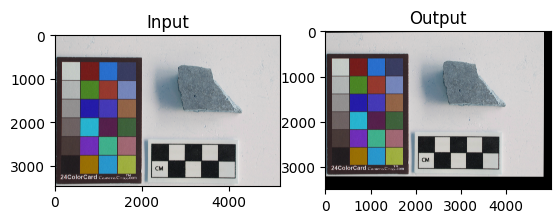

In [224]:
rows,cols,ch = img.shape
geocal = cv.getPerspectiveTransform(original_pers,target_pers)
dst = cv.warpPerspective(img,geocal,(5000,3500))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

In [227]:
cv.imwrite('output.jpg', dst, [cv.IMWRITE_JPEG_QUALITY, 90])

True